In [ ]:
!unzip '/content/Thermal Dogs and People.v3-ex-rf-train.multiclass.zip'
%ls


Archive:  /content/Thermal Dogs and People.v3-ex-rf-train.multiclass.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/IMG_0002 4_jpg.rf.4c2b958cb5cee437006841da59b83a13.jpg  
 extracting: test/IMG_0006 5_jpg.rf.adf2bfa382f8a74dbdbb8e0f74943446.jpg  
 extracting: test/IMG_0009_jpg.rf.a61c671b45ce694c49102cf3f5e2ca88.jpg  
 extracting: test/IMG_0012 2_jpg.rf.4ca8a689998d972d80261a18b780929e.jpg  
 extracting: test/IMG_0022_jpg.rf.b4ce491868042c1f1169cf68dbc31b83.jpg  
 extracting: test/IMG_0023 3_jpg.rf.be718f521f7a84361f44506613686fab.jpg  
 extracting: test/IMG_0024 2_jpg.rf.293d99b0cf87f0964a19eac4c9249b4f.jpg  
 extracting: test/IMG_0027_jpg.rf.92d5f4ae980aa60066647d23167ed832.jpg  
 extracting: test/IMG_0031 2_jpg.rf.8a1d9c3532a4fafbc6668022667f6216.jpg  
 extracting: test/IMG_0033 2_jpg.rf.62f64734bc8c576f5fa9aff4bb5e39a0.jpg  
 extracting: test/IMG_0037 2_jpg.rf.fa1857b1c918de5634de62103730a6b0.jpg  
 extracting: 

### Load Packages

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
import tensorflow as tf
import os
import re

In [ ]:
tf.data.experimental.enable_debug_mode()

### Image Preprocessing and Visualization

##### Processing Testing Dataset

In [ ]:
# Global variable for annotations dictionary
annotations_dict = {}

# Function to load and preprocess the image
def load_image(image_id, folder_path):
    image_path = tf.strings.join([folder_path, image_id], separator=os.sep)
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0  # Normalize to [0, 1]
    return image

# Load annotations into a global dictionary
def load_annotations(annotation_file):
    global annotations_dict
    annotations_df = pd.read_csv(annotation_file)
    annotations_df.columns = annotations_df.columns.str.strip()
    annotations_dict = {row['filename']: [row['dog'], row['person']] for _, row in annotations_df.iterrows()}

# Get the corresponding labels for an image from the global annotations dictionary
def get_labels(image_id):
    image_id_str = image_id.numpy().decode('utf-8')
    labels = annotations_dict.get(image_id_str, [0, 0])  # Default to [0, 0] if not found
    return tf.convert_to_tensor(labels, dtype=tf.int32)

# Function to create a TensorFlow dataset
def create_dataset(folder_path, annotation_file, batch_size, shuffle_flag=True):
    # Load annotations into the global dictionary
    load_annotations(annotation_file)

    # Convert filenames to tensors
    filenames = list(annotations_dict.keys())
    filenames_tensor = tf.convert_to_tensor(filenames, dtype=tf.string)

    def tf_load_image(image_id):
        return tf.py_function(func=load_image, inp=[image_id, folder_path], Tout=tf.float32)

    def tf_load_labels(image_id):
        return tf.py_function(func=get_labels, inp=[image_id], Tout=tf.int32)

    # Create a dataset using the filenames
    dataset = tf.data.Dataset.from_tensor_slices(filenames_tensor)
    dataset = dataset.map(lambda x: (tf_load_image(x), tf_load_labels(x)), num_parallel_calls=tf.data.experimental.AUTOTUNE)

    if shuffle_flag:
        dataset = dataset.shuffle(buffer_size=1000)  # Shuffle with a buffer size of 1000

    dataset = dataset.batch(batch_size, drop_remainder=True)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

    return dataset

# Paths to image folder and annotation file
folder_path = "./test"  # Update with the correct path
annotation_file = "./test/_classes.csv"  # Update with the correct path

# Create dataset
try:
    test_dataset = create_dataset(folder_path, annotation_file, 20)
    print("Test Dataset created successfully")
except Exception as e:
    print(f"Error creating dataset: {e}")



Test Dataset created successfully


##### Processing Training Dataset

In [ ]:
# Global variable for annotations dictionary
import os
import pandas as pd
import tensorflow as tf

# Global variable for annotations dictionary
annotations_dict1 = {}

# Function to load and preprocess the image
def load_image1(image_id, folder_path):
    image_path = tf.strings.join([folder_path, image_id], separator=os.sep)
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0  # Normalize to [0, 1]
    return image

# Load annotations into a global dictionary
def load_annotations1(annotation_file):
    global annotations_dict1
    annotations_df1 = pd.read_csv(annotation_file)
    annotations_df1.columns = annotations_df1.columns.str.strip()
    annotations_dict1 = {row['filename']: [row['dog'], row['person']] for _, row in annotations_df1.iterrows()}

# Get the corresponding labels for an image from the global annotations dictionary
def get_labels1(image_id):
    image_id_str = image_id.numpy().decode('utf-8')
    labels = annotations_dict1.get(image_id_str, [0, 0])  # Default to [0, 0] if not found
    return tf.convert_to_tensor(labels, dtype=tf.int32)

# Function to create a TensorFlow dataset
def create_dataset1(folder_path, annotation_file, batch_size, shuffle_flag=True):
    # Load annotations into the global dictionary
    load_annotations1(annotation_file)

    # Convert filenames to tensors
    filenames = list(annotations_dict1.keys())
    filenames_tensor = tf.convert_to_tensor(filenames, dtype=tf.string)

    def tf_load_image1(image_id):
        return tf.py_function(func=load_image1, inp=[image_id, folder_path], Tout=tf.float32)

    def tf_load_labels1(image_id):
        return tf.py_function(func=get_labels1, inp=[image_id], Tout=tf.int32)

    # Create a dataset using the filenames
    dataset1 = tf.data.Dataset.from_tensor_slices(filenames_tensor)
    dataset1 = dataset1.map(lambda x: (tf_load_image1(x), tf_load_labels1(x)), num_parallel_calls=tf.data.experimental.AUTOTUNE)

    if shuffle_flag:
        dataset1 = dataset1.shuffle(buffer_size=1000)  # Shuffle with a buffer size of 1000

    dataset1 = dataset1.batch(batch_size, drop_remainder=True)
    dataset1 = dataset1.prefetch(tf.data.experimental.AUTOTUNE)

    return dataset1

# Paths to image folder and annotation file
folder_path1 = "./train"  # Update with the correct path
annotation_file1 = "./train/_classes.csv"  # Update with the correct path

# Create dataset
try:
    train_dataset = create_dataset1(folder_path1, annotation_file1, 32)
    print("Train Dataset created successfully")
except Exception as e:
    print(f"Error creating dataset: {e}")




Train Dataset created successfully


##### Processing Validation Dataset

In [ ]:
# Global variable for annotations dictionary
annotations_dict2 = {}

# Function to load and preprocess the image
def load_image2(image_id, folder_path):
    image_path = tf.strings.join([folder_path, image_id], separator=os.sep)
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0  # Normalize to [0, 1]
    return image

# Load annotations into a global dictionary
def load_annotations2(annotation_file):
    global annotations_dict2
    annotations_df2 = pd.read_csv(annotation_file)
    annotations_df2.columns = annotations_df2.columns.str.strip()  # Strip any leading/trailing spaces
    annotations_dict2 = {row['filename']: [row['dog'], row['person']] for _, row in annotations_df2.iterrows()}

# Get the corresponding labels for an image from the global annotations dictionary
def get_labels2(image_id):
    image_id_str = image_id.numpy().decode('utf-8')
    labels = annotations_dict2.get(image_id_str, [0, 0])  # Default to [0, 0] if not found
    return tf.convert_to_tensor(labels, dtype=tf.int32)

# Function to create a TensorFlow dataset
def create_dataset2(folder_path, annotation_file, batch_size, shuffle_flag=True):
    # Load annotations into the global dictionary
    load_annotations2(annotation_file)

    # Convert filenames to tensors
    filenames = list(annotations_dict2.keys())
    filenames_tensor = tf.convert_to_tensor(filenames, dtype=tf.string)

    def tf_load_image2(image_id):
        return tf.py_function(func=load_image2, inp=[image_id, folder_path], Tout=tf.float32)

    def tf_load_labels2(image_id):
        return tf.py_function(func=get_labels2, inp=[image_id], Tout=tf.int32)

    # Create a dataset using the filenames
    dataset2 = tf.data.Dataset.from_tensor_slices(filenames_tensor)
    dataset2 = dataset2.map(lambda x: (tf_load_image2(x), tf_load_labels2(x)), num_parallel_calls=tf.data.experimental.AUTOTUNE)

    if shuffle_flag:
        dataset2 = dataset2.shuffle(buffer_size=1000)  # Shuffle with a buffer size of 1000

    dataset2 = dataset2.batch(batch_size, drop_remainder=True)
    dataset2 = dataset2.prefetch(tf.data.experimental.AUTOTUNE)

    return dataset2

# Paths to image folder and annotation file
folder_path2 = "./valid"  # Update with the correct path
annotation_file2 = "./valid/_classes.csv"  # Update with the correct path

# Create dataset
try:
    val_dataset = create_dataset2(folder_path2, annotation_file2, 8)
    print("Validation Dataset created successfully")
except Exception as e:
    print(f"Error creating dataset: {e}")


Validation Dataset created successfully


###### Training dataset - Batch Size -32

In [ ]:
# Iterate over the Training dataset for verification
for image, labels in train_dataset.take(1):  # Just take 1 batch for demonstration
    print("Image shape:", image.shape)
    print("Labels:", labels)

Image shape: (32, 224, 224, 3)
Labels: tf.Tensor(
[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 0]], shape=(32, 2), dtype=int32)


###### Validation dataset - Batch Size - 8

In [ ]:
for image, labels in val_dataset.take(1):  # Just take 1 batch for demonstration
    print("Image shape:", image.shape)
    print("Labels:", labels)

Image shape: (8, 224, 224, 3)
Labels: tf.Tensor(
[[1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]], shape=(8, 2), dtype=int32)


In [ ]:
for image, labels in test_dataset.take(1):  # Just take 1 batch for demonstration
    print("Image shape:", image.shape)
    print("Labels:", labels)

Image shape: (20, 224, 224, 3)
Labels: tf.Tensor(
[[1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]], shape=(20, 2), dtype=int32)


In [ ]:
print("No of elements in the training data set",len(train_dataset))
print("No of elements in the validation data set",len(val_dataset))
print("No of elements in the test data set",len(test_dataset))

No of elements in the training data set 13
No of elements in the validation data set 5
No of elements in the test data set 1


In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
# Set parameters
EPOCHS_INITIAL = 10  # Initial training epochs with frozen base layers
EPOCHS_FINE_TUNING = 10  # Fine-tuning epochs after unfreezing layers
BATCH_SIZE = 32
LEARNING_RATE_INITIAL = 1e-2 # Initial learning rate for frozen layers
LEARNING_RATE_FINE_TUNE = 1e-5  # Lower learning rate for fine-tuning

## MobileNet

#### Model-Training by adding cutome layers (with frozen mobilenet layers)

In [ ]:
base_model1 = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Add custom layers for multi-label classification
x = base_model1.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
output_layer = Dense(2, activation='sigmoid')(x)  # Output layer for multi-label classification

In [ ]:
model1 = Model(inputs=base_model1.input, outputs=output_layer)

In [ ]:
base_model1.trainable = False

In [ ]:
# Compile the model with the initial learning rate
model1.compile(optimizer=Adam(learning_rate=LEARNING_RATE_INITIAL),
              loss='binary_crossentropy',  # Suitable for multi-label classification
              metrics=['accuracy'])

In [ ]:
# Print the model summary to confirm the output shape
print("Model Summary:")
model1.summary()

Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,280,514 (16.33 MB)

 Trainable params: 1,051,650 (4.01 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [ ]:
for images, labels in val_dataset.take(1):
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)

Image batch shape: (8, 224, 224, 3)
Label batch shape: (8, 2)


In [ ]:
for images, labels in train_dataset.take(1):
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)

Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 2)


In [ ]:
# Initial training with frozen layers
print("Starting initial training with frozen ResNet-50 layers...")
history_initial = model1.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS_INITIAL
)

Starting initial training with frozen ResNet-50 layers...
Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 260ms/step - accuracy: 0.5395 - loss: 7.9458 - val_accuracy: 0.6000 - val_loss: 0.5755
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 361ms/step - accuracy: 0.7843 - loss: 0.3926 - val_accuracy: 0.7750 - val_loss: 0.3414
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - accuracy: 0.8408 - loss: 0.2428 - val_accuracy: 0.8000 - val_loss: 0.2245
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 320ms/step - accuracy: 0.8339 - loss: 0.1564 - val_accuracy: 0.8000 - val_loss: 0.2450
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 263ms/step - accuracy: 0.8678 - loss: 0.1168 - val_accuracy: 0.8500 - val_loss: 0.2793
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 317ms/step - accuracy: 0.8409 - loss: 0.0956 - val_accuracy: 0.7750 - val_loss: 0.2726
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 263ms/step - accuracy: 0.8346 - loss: 0.0644 - val_accuracy: 0.8250 - val_loss: 0.2604
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 307m

In [ ]:
for layer in base_model1.layers[-10:]:
    layer.trainable = True

#### Model fine-tunning  (with 10 unfrozen mobilenet layers)

In [ ]:
# Re-compile the model with a lower learning rate for fine-tuning
model1.compile(optimizer=Adam(learning_rate=LEARNING_RATE_FINE_TUNE),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fine-tuning training
print("Starting fine-tuning with some ResNet-50 layers unfrozen...")
history_fine_tuning = model1.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

Starting fine-tuning with some ResNet-50 layers unfrozen...
Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.8240 - loss: 0.1614 - val_accuracy: 0.8750 - val_loss: 0.3497
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 363ms/step - accuracy: 0.8473 - loss: 0.1012 - val_accuracy: 0.8750 - val_loss: 0.3600
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 297ms/step - accuracy: 0.8131 - loss: 0.0666 - val_accuracy: 0.8750 - val_loss: 0.3817
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 372ms/step - accuracy: 0.8520 - loss: 0.0645 - val_accuracy: 0.8250 - val_loss: 0.3976
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 298ms/step - accuracy: 0.8320 - loss: 0.0659 - val_accuracy: 0.8500 - val_loss: 0.4176
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 380ms/step - accuracy: 0.8385 - loss: 0.0332 - val_accuracy: 0.8250 - val_loss: 0.4270
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 296ms/step - accuracy: 0.8278 - loss: 0.0281 - val_accuracy: 0.8250 - val_loss: 0.4387
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 352

#### Model Testing and Evaluation

In [ ]:
test_loss, test_accuracy = model1.evaluate(test_dataset)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.7500 - loss: 0.2846
Test Loss: 0.28463035821914673, Test Accuracy: 0.75


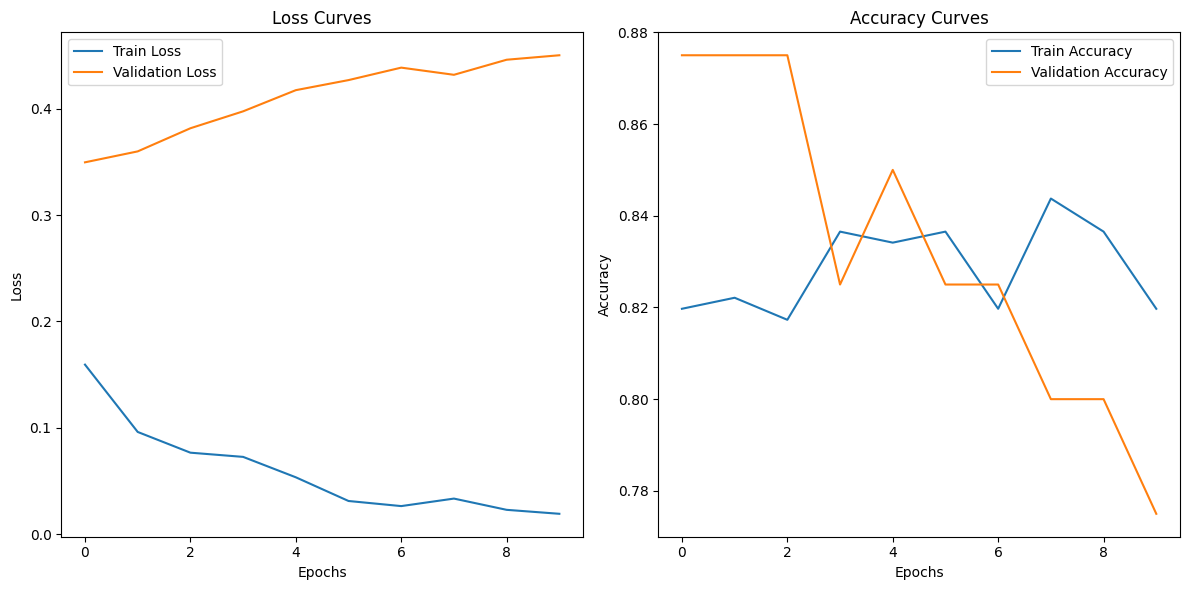

In [ ]:
import matplotlib.pyplot as plt

# Extract the history data
history_dict = history_fine_tuning.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Assuming you have a test_dataset defined as a tf.data.Dataset object
# Extract the true labels from the test set
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

# Get predictions for the test set
y_pred_probs = model1.predict(test_dataset)
# Convert probabilities to binary predictions (0 or 1) using a threshold (e.g., 0.5)
y_pred = (y_pred_probs > 0.5).astype(int)

# Labels for the multi-label classification
labels = ["dog", "person"]

# Display the classification report for each label
report = classification_report(y_true, y_pred, target_names=labels, zero_division=0)
print(report)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
              precision    recall  f1-score   support

         dog       0.50      0.45      0.48        11
      person       0.54      0.64      0.58        11

   micro avg       0.52      0.55      0.53        22
   macro avg       0.52      0.55      0.53        22
weighted avg       0.52      0.55      0.53        22
 samples avg       0.47      0.47      0.45        22



### Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


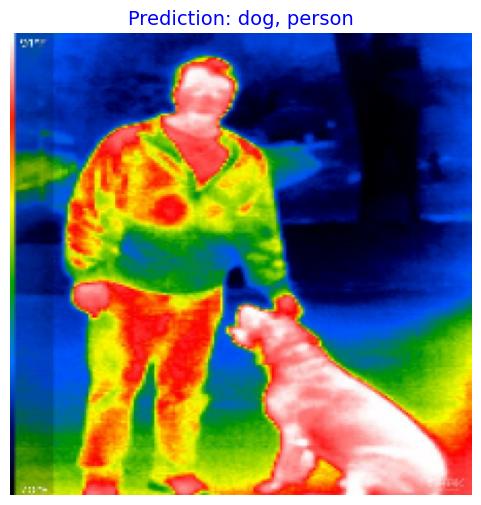

{'dog': 1, 'person': 1}

In [ ]:
def predict_image(image_path):
    # Load and preprocess the image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])
    image = image / 255.0  # Normalize to [0, 1]
    image = tf.expand_dims(image, 0)  # Add batch dimension

    # Make the prediction
    prediction = model1.predict(image)

    # Decode predictions for multi-label classification
    labels = ["dog", "person"]
    result = {labels[i]: int(prediction[0][i] > 0.5) for i in range(len(labels))}

    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(tf.squeeze(image))  # Remove batch dimension for display
    plt.axis('off')  # Hide axes

    # Display labels on the image
    label_text = ", ".join([label for label, present in result.items() if present])
    plt.title(f"Prediction: {label_text if label_text else 'None'}", fontsize=14, color="blue")
    plt.show()

    return result

# Example prediction and visualization
image_path1 = "/content/test/IMG_0059_jpg.rf.d8c01c374b2031bddbad3b02eaf35b89.jpg"
predict_image(image_path1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


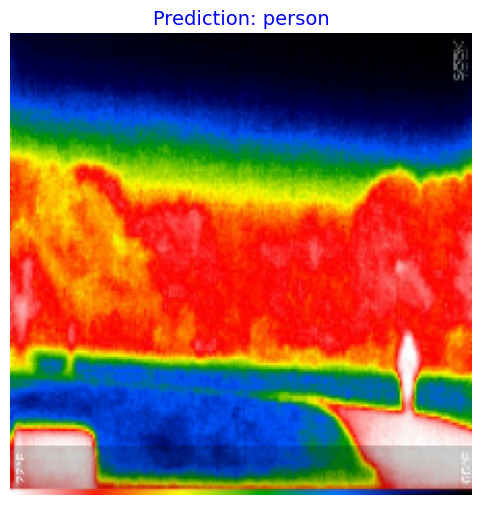

{'dog': 0, 'person': 1}

In [ ]:
image_path2 = "/content/test/IMG_0031 2_jpg.rf.8a1d9c3532a4fafbc6668022667f6216.jpg"
predict_image(image_path2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


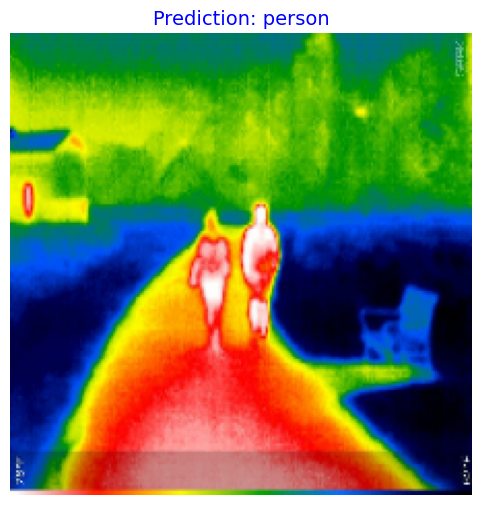

{'dog': 0, 'person': 1}

In [ ]:
image_path2 = '/content/test/IMG_0012 2_jpg.rf.4ca8a689998d972d80261a18b780929e.jpg'
predict_image(image_path2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


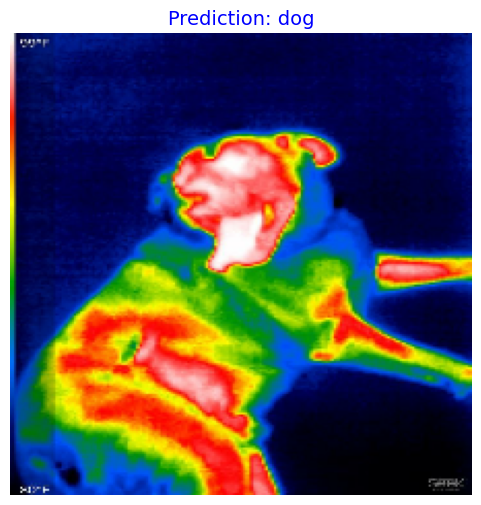

{'dog': 1, 'person': 0}

In [ ]:
image_path2 = '/content/test/IMG_0115_jpg.rf.26dbda66face99f615bfbfb9739b0bb2.jpg'
predict_image(image_path2)